In [8]:
from io import StringIO
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# dimension, n, avgDeg, alpha, ple, threads, seed, plot, TimeWeights, TimePositions, TimeBinary, TimeEdges, GenNumEdge, GenAvgDeg
data = pd.read_csv("soap5.log")

# base
# d = 1;
# n = 1<<15; // = 32768
# alpha = std::numeric_limits<double>::infinity();
# alpha_binomial = 2.0;
# ple = 2.5;
# deg=10;
# threads = 1;

In [10]:
plt.rcParams.update({'font.size': 13})

def plot(plot_data, attribute):
    frame = plot_data.groupby(attribute)

    fig, ax = plt.subplots(figsize=(7,4))
    xs = frame[attribute].first()
    edges = frame["n"].first() * frame["avgDeg"].first() / 2
    
    ax.set_xlabel(attribute)
    ax.set_ylabel("Walltime [ns] per Edge")
    ax.grid()
    ax.loglog()
    for key in data.keys():
        if not 'Time' in key:
            continue
        ys = frame[key].mean() / edges * 10**6
        yerr = frame[key].std() / edges * 10**6
        ax.plot(xs, ys, 'xk')
        ax.errorbar(xs, ys, yerr, fmt='--', label=key[4:])

    
    return ax

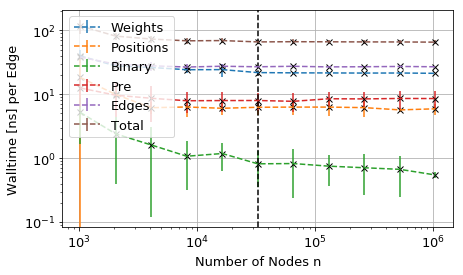

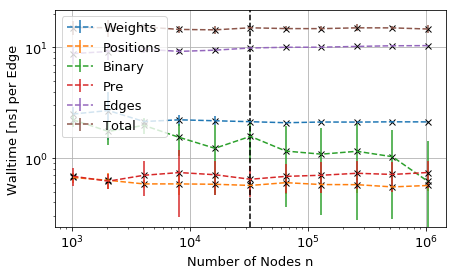

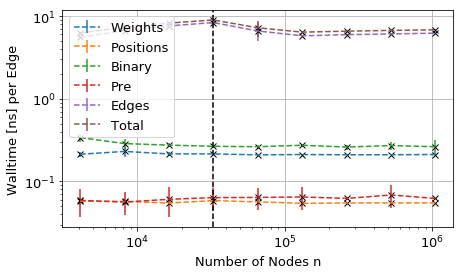

In [11]:
# plot 0: growing n
plot_data = data[data["plot"]==0].groupby(['avgDeg'])
for deg, deg_frame in plot_data:
    ax = plot(deg_frame, "n")
    ax.set_xlabel("Number of Nodes n")
    ax.legend(loc=2)
    ax.axvline(x=32768, color='k', linestyle='--')
    plt.savefig("girg_n_" + str(deg) + ".pdf", bbox_inches='tight')

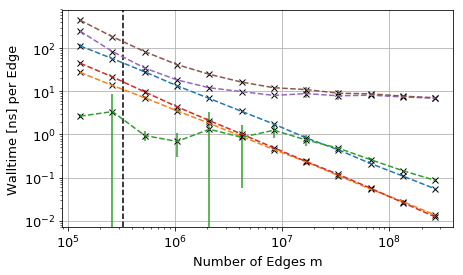

In [12]:
# plot 1: growing deg
data["m"] = data["n"]*data["avgDeg"] * 2
ax = plot(data[data["plot"]==1], "m")
ax.axvline(x=32768*10, color='k', linestyle='--')
ax.set_xlabel("Number of Edges m")
plt.savefig("girg_m.pdf", bbox_inches='tight')

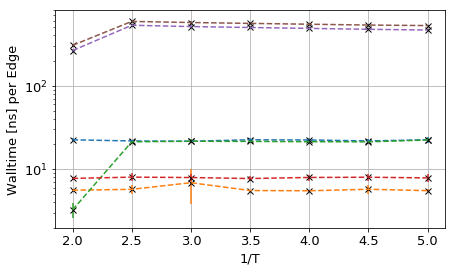

In [13]:
# plot 2: growing alpha
ax = plot(data[data["plot"]==2], "alpha")
ax.set_xlabel('1/T')
ax.set_xscale('linear')
plt.savefig("girg_alpha.pdf", bbox_inches='tight')

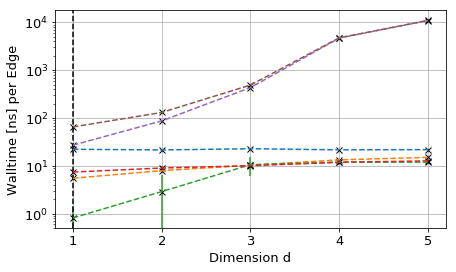

In [14]:
# plot 3: growing dimension
ax = plot(data[data["plot"]==3], "dimension")
ax.axvline(x=1, color='k', linestyle='--')
ax.set_xscale('linear')
from matplotlib.ticker import MaxNLocator
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_xlabel("Dimension d")
plt.savefig("girg_dimension.pdf", bbox_inches='tight')